# ThinkBayes Practice

Going through the exercises from the book [ThinkBayes](https://greenteapress.com/wp/think-bayes/).

Unfortunately, the book and code examples are written for Python 2, so that's what this Notebook is as well.

#### Link Dump
* [math in markdown](http://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/)
* [seaborn distributions](http://seaborn.pydata.org/tutorial/distributions.html)

## Instructions for getting a Python 2 Jupyter Notebook
```
conda create -n py2 python=2 anaconda
conda activate py2
ipython kernel install
```

In [3]:
import sys
sys.path.append('../ThinkBayes/code/')

In [34]:
from __future__ import print_function

### Notes

**Bayes Theorem**

p(A and B) = p(B and A)

p(A and B) = p(A) $\times$ p(B|A)

p(B and A) = P(B) $\times$ p(A|B)

p(B) $\times$ p(A|B) = p(A) $\times$ p(B|A)

p(A|B) = $\frac{p(A)p(B|A)}{p(B)}$

**Diachronic Interpretation**

H = Hypothesis (prior)

D = Data

p(H|D) = $\frac{p(H)p(D|H)}{p(D)}$        

p(D|H) - likelihood

p(H|D) - posterior


# Chapter 4 - More Estimation
## The beta distribution

Why Beta?

**conjugate prior** - if the prior distribution is a beta distribution, the posterior is also a beta distribution. This is useful for making updates with new data.

Beta depends on $\alpha$ and $\beta$ params - an update to the distribution is two simple additions ($\alpha$+h and $\beta$+t) in the case of `heads` and `tails`.

$\alpha$=1 and $\beta$=1 is a uniform distribution from 0 $\to$ 1

In [66]:
import seaborn as sns
import numpy as np
import matplotlib

In [17]:
values = [np.random.beta(1,1) for i in xrange(10000)]

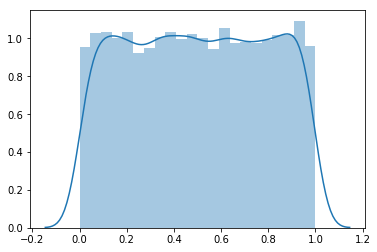

In [18]:
sns.distplot(values)

In [20]:
from thinkbayes import Beta

### Euro Problem

Flipped a Euro, saw 140 Heads and 110 Tails

In [58]:
beta = Beta()
beta.Update((140, 110))
print("Mean: ", beta.Mean())

Mean:  0.559523809524


In [77]:
ax = matplotlib.axes

(0, 1)

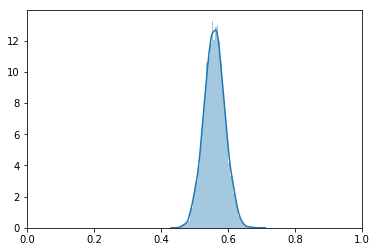

In [79]:
sns.distplot(beta.Sample(10000)).set_xlim(0,1)

# Chapter 5 - Odds and Addends

Odds:   10% = 9:1

In [97]:
import thinkbayes
import thinkplot

In [90]:
class Die(thinkbayes.Pmf):
    def __init__(self, sides):
        thinkbayes.Pmf.__init__(self)
        for x in xrange(1, sides+1):
            self.Set(x, 1)
        self.Normalize()

In [91]:
dice = [Die(6), Die(6), Die(6)]

In [102]:
samples = thinkbayes.SampleSum(dice, 10000)

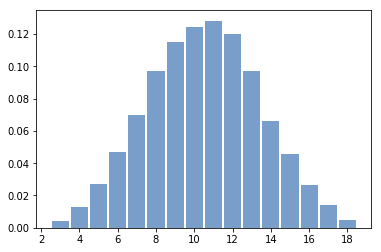

In [103]:
thinkplot.Hist(samples)

{'xscale': 'linear', 'yscale': 'linear'}

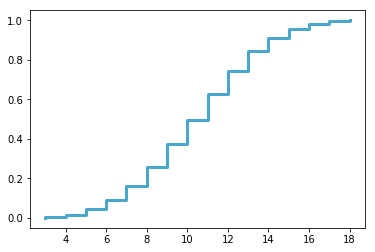

In [106]:
thinkplot.Cdf(samples.MakeCdf())

In [108]:
d6 = Die(6)
d8 = Die(8)

In [109]:
mix = thinkbayes.Pmf()
for die in [d6, d8]:
    for outcome, prob in die.Items():
        mix.Incr(outcome, prob)
mix.Normalize()

1.9999999999999996

In [111]:
pmf_dice = thinkbayes.Pmf()
pmf_dice.Set(Die(4), 5)
pmf_dice.Set(Die(8), 3)
pmf_dice.Normalize()

8

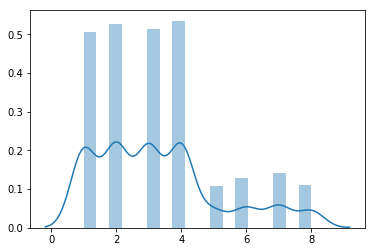

In [119]:
d_values = [pmf_dice.Random().Random() for x in xrange(1000)]
sns.distplot(d_values)

# Chapter 6 - Decision Analysis

In [124]:
import price

In [190]:
pirData = price.ReadData('showcases.2011.csv') #+ price.ReadData('showcases.2012.csv')

In [198]:
pirPmf = Pmf([x[0] for x in pirData])# + [x[1] for x in pirData])

In [196]:
pirList = [x[0] for x in pirData] + [x[1] for x in pirData]
pirS1 = [x[0] for x in pirData]
pirS2 = [x[1] for x in pirData]

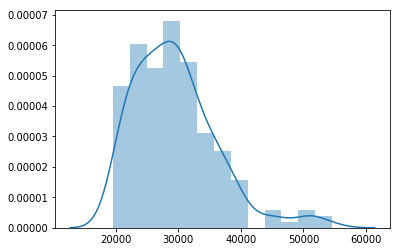

In [197]:
sns.distplot(pirS1)

In [199]:
pirPmf.Mean()

29571.82010582012

### Probability Density Functions

In [144]:
from thinkbayes import GaussianPdf

In [147]:
gauss = GaussianPdf(0, 1)

In [151]:
gauss.Density(0.2)

0.3910426939754559

In [152]:
import scipy.stats as stats

In [175]:
pdf = thinkbayes.EstimatedPdf(pirList)

In [180]:
pmf = pdf.MakePmf(np.linspace(0, 75000, 1001))

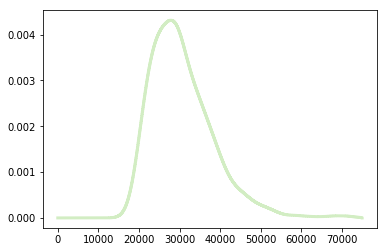

In [181]:
thinkplot.Pmf(pmf)

In [184]:
kde = stats.gaussian_kde(pirList)

In [189]:
pmf.Mean()

30669.2488950886

# Chapter 7 - Prediction

#### Hockey

1. Assume goal scoring is a Poisson process.
2. Assume each team has a long-term goals per game, $\lambda$

##### Strategy
1. Choose a prior for $\lambda$
2. Use score from first 4 games to estimate $\lambda$ for each team
3. Use posterior of $\lambda$ to compute distribution of goals for each team, distribution of goal differential, and prob that each team wins the next time
4. Compute probability that each team wins the series

Avg goals per game: $\mu$ = 2.8 $\sigma$ = 0.3

In [200]:
hockeyPmf = thinkbayes.MakeGaussianPmf(2.8, 0.3, 4, 101)

In [201]:
hockeyPmf.Mean()

2.8000000000000003

#### Poisson
A poisson process is a continuous version of a Bernoulli process (series of trials).
Used to model customers arriving at a store, buses arriving at a stop, goals scored in a hockey game, etc.

In [204]:
thinkbayes.EvalPoissonPmf(3, 2.8)

0.22248374912479738

In [205]:
import hockey

In [207]:
bruins = hockey.Hockey('Bruins')
canucks = hockey.Hockey('Canucks')

In [208]:
bruins.UpdateSet([0,2,8,4])
canucks.UpdateSet([1,3,1,0])

0.0004674811044859316

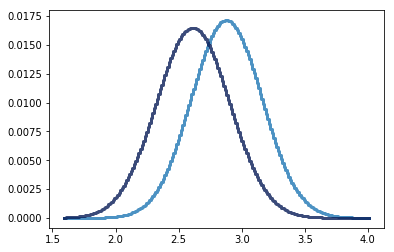

In [209]:
thinkplot.Pmfs([bruins, canucks])

In [211]:
print(bruins.MaximumLikelihood())
print(canucks.MaximumLikelihood())

2.872
2.608


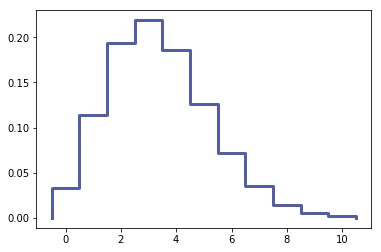

In [213]:
thinkplot.Pmf(thinkbayes.MakePoissonPmf(3.4, 10))

In [215]:
bruins_mix = hockey.MakeGoalPmf(bruins)
canucks_mix = hockey.MakeGoalPmf(canucks)

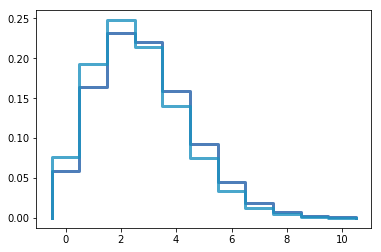

In [216]:
thinkplot.Pmfs([bruins_mix, canucks_mix])

In [218]:
diff = bruins_mix - canucks_mix

In [220]:
print(diff.ProbGreater(0))
print(diff.ProbLess(0))
print(diff.Prob(0))

0.4579964920723548
0.37029340895451957
0.171710098973125


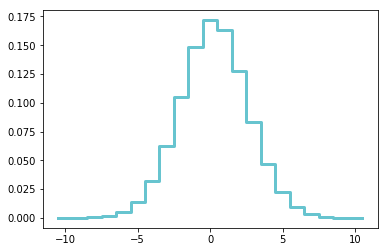

In [221]:
thinkplot.Pmf(diff)